## Simple linear regression

In [23]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## create dataset

In [ ]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles") # download dataset from https://www.kaggle.com/ .

df = pd.read_csv(path + r"\CO2 Emissions_Canada.csv")
df.head()

100%|██████████| 88.3k/88.3k [00:00<00:00, 411kB/s]

Extracting files...


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Emissions analysis with engine size feature

### preprocessing

In [ ]:
cdf1 = df[['Engine Size(L)', 'CO2 Emissions(g/km)']] # We separate the two desired columns from the table.

cdf1['Engine Size(L)'].describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

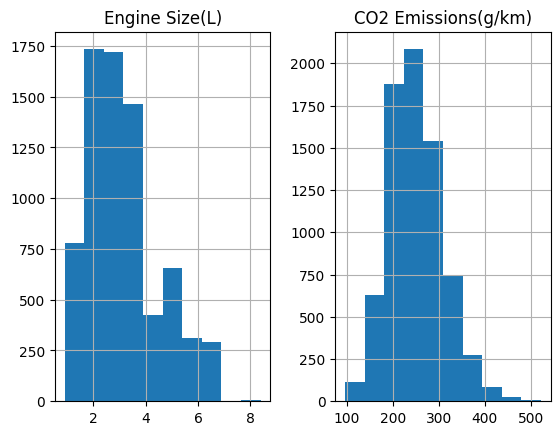

In [28]:
vis1 = cdf1[['Engine Size(L)', 'CO2 Emissions(g/km)']]
vis1.hist()
plt.show()

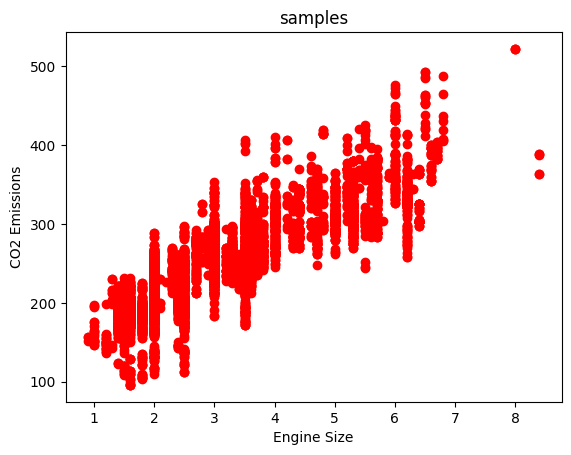

In [13]:
plt.scatter(cdf1['Engine Size(L)'], cdf1['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [17]:
msk = np.random.rand(len(df)) < 0.8 # split train and test data.

train = cdf1[msk]
test = cdf1[~msk]

train.shape, test.shape

((5964, 2), (1421, 2))

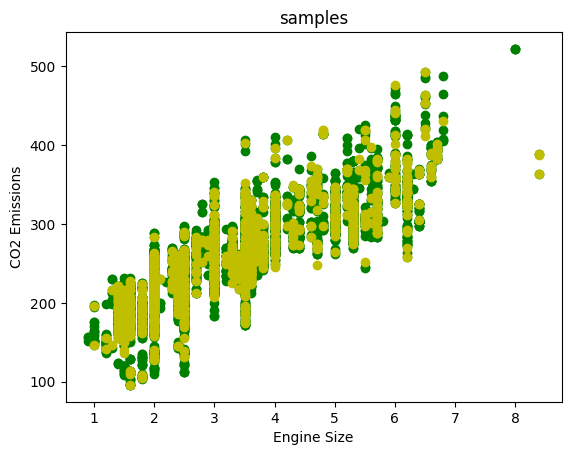

In [ ]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], c='g') # to visualize train and test samples. 
plt.scatter(test['Engine Size(L)'], test['CO2 Emissions(g/km)'], c='y')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### model definition

In [20]:
model1 = LinearRegression()

x_train = np.asanyarray(train[['Engine Size(L)']])
y_train = np.asanyarray(train[['CO2 Emissions(g/km)']])

model1.fit(x_train, y_train)

print(model1.coef_, model1.intercept_)

[[36.80494697]] [133.97733498]


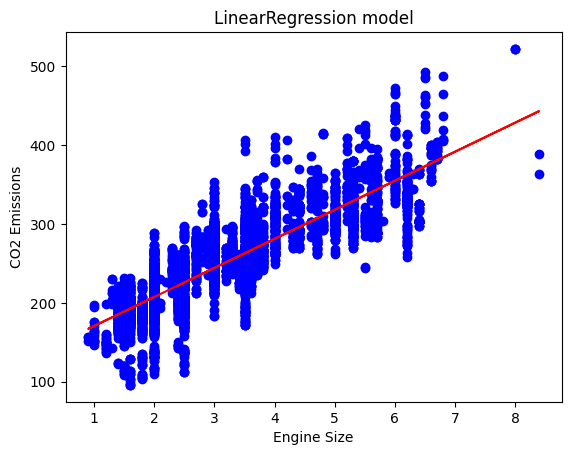

In [22]:
plt.scatter(x_train, y_train, c='b')
plt.plot(x_train, model1.coef_[0][0] * x_train + model1.intercept_[0], c='r')
plt.title('LinearRegression model')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### evaluating

In [24]:
x_test = np.asanyarray(test[['Engine Size(L)']])
y_test = np.asanyarray(test[['CO2 Emissions(g/km)']])

y_pred_test = model1.predict(x_test)

In [25]:
MAE1 = np.mean(np.absolute(y_test - y_pred_test)) # Mean Absolute Error
MSE1 = np.mean((y_test - y_pred_test) ** 2) # Mean Squared Error
R2_score1 = r2_score(y_test, y_pred_test) # R2 Error

print(f"Mean Absolute Error : {MAE1} | Mean Squared Error : {MSE1} | R2 Error : {R2_score1}")

Mean Absolute Error : 23.801074280125956 | Mean Squared Error : 971.4516351392862 | R2 Error : 0.7220564556919646


## Emissions analysis with Cylinders feature

### preprocessing

In [29]:
cdf2 = df[['Cylinders', 'CO2 Emissions(g/km)']]

cdf2['Cylinders'].describe()

count    7385.000000
mean        5.615030
std         1.828307
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        16.000000
Name: Cylinders, dtype: float64

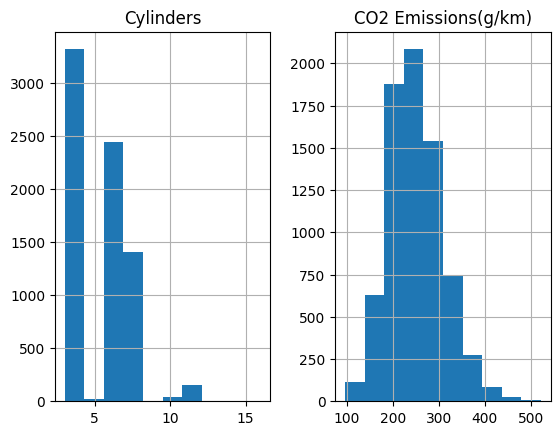

In [30]:
vis2 = cdf2[['Cylinders', 'CO2 Emissions(g/km)']]
vis2.hist()
plt.show()

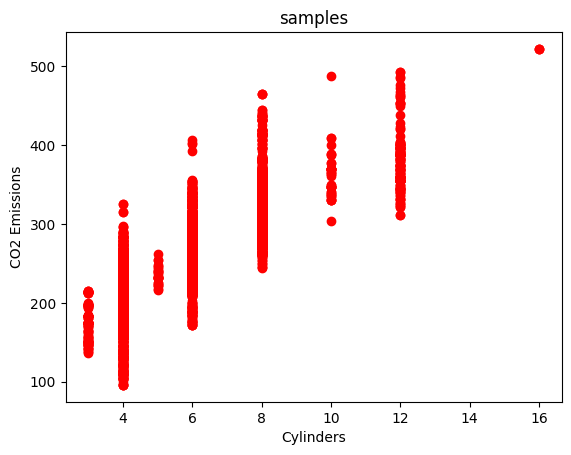

In [31]:
plt.scatter(cdf2.Cylinders, cdf2['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()